In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [6]:
df=pd.read_csv('Train/Train.csv')

In [7]:
dfx1=df['feature_1']
dfx2=df['feature_2']
dfx3=df['feature_3']
dfx4=df['feature_4']
dfx5=df['feature_5']
dfy=df['target']

In [8]:
x1=dfx1.values.reshape((-1,))
x2=dfx2.values.reshape((-1,))
x3=dfx3.values.reshape((-1,))
x4=dfx4.values.reshape((-1,))
x5=dfx5.values.reshape((-1,))
y=dfy.values.reshape((-1,))

In [9]:
def hypothesis(x1,x2,x3,x4,x5,theta):
    return theta[0]+theta[1]*x1+theta[2]*x2+theta[3]*x3+theta[4]*x4+theta[5]*x5    

In [33]:
def error(x1,x2,x3,x4,x5,y,theta):
    error=0
    for i in range(x1.shape[0]):
        hx=hypothesis(x1[i],x2[i],x3[i],x4[i],x5[i],theta)
        error+=(hx-y[i])**2
    return error

In [34]:
def gradient(x1,x2,x3,x4,x5,y,theta):
    grad=np.zeros((6,))
    for i in range(x1.shape[0]):
        hx=hypothesis(x1[i],x2[i],x3[i],x4[i],x5[i],theta)
        grad[0]+=hx-y[i]
        grad[1]+=(hx-y[i])*x1[i]
        grad[2]+=(hx-y[i])*x2[i]
        grad[3]+=(hx-y[i])*x3[i]
        grad[4]+=(hx-y[i])*x4[i]
        grad[5]+=(hx-y[i])*x5[i]
    return grad

In [45]:
def gradientDescent(x1,x2,x3,x4,x5,y,lrate=0.001):
    theta=np.array([0.0,0.0,0.0,0.0,0.0,0.0])
    max_itr=100
    itr=0
    error_list=[]
    while(itr<=max_itr):
        grad=gradient(x1,x2,x3,x4,x5,y,theta)
        err=error(x1,x2,x3,x4,x5,y,theta)
        error_list.append(err)
        theta[0]-=lrate*grad[0]
        theta[1]-=lrate*grad[1]
        theta[2]-=lrate*grad[2]
        theta[3]-=lrate*grad[3]
        theta[4]-=lrate*grad[4]
        theta[5]-=lrate*grad[5]
        itr+=1
    return theta,error_list

In [46]:
final_theta,error_list=gradientDescent(x1,x2,x3,x4,x5,y)

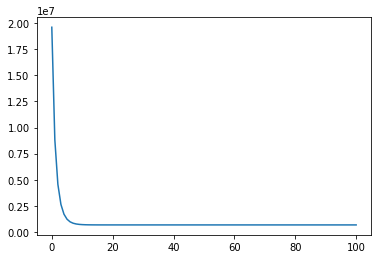

In [47]:
plt.plot(error_list)